<center>
    <h1><font color="blue">Quicklook CUD</font></h1>
</center>

> <font color="green">**Todo**</font>
* Investigate Tracker Low energy events.
* look at the revan.
* simulation.
* Triggers.

# <font color="blue"> Imports

In [1]:
%matplotlib inline
import h5py
import os
import time

# import seaborn as sns
import numpy as np
#import plotly.express as px

#from fpdf import FPDF

from matplotlib import pyplot as plt
from importlib import reload

from scipy.optimize import curve_fit

# <font color="blue">Parameter Selections</font>

In [2]:
file_dict= {
    "run1"  :   "/Users/swasti/code/beamtest/run1/2022-04-25_1650913642_5MeVBeam_1hour_Tracker.CUD.h5",
    "run2"  :   "/Users/swasti/code/beamtest/run2/archived/2022-04-25_1650919095_5MeVBeam_1hour_run2_tracker.CUD.h5",
    "run3"  :   "/Users/swasti/code/beamtest/run3/2022-04-25_1650924059_5MevBeam_1hour_run3_tracker.CUD.h5",
    "run4"  :   "/Users/swasti/code/beamtest/run4/2022-04-25_1650928296_5MeVBeam_1hour_run4_tracker.CUD.h5",
    "run5"  :   "/Users/swasti/code/beamtest/run5/2022-04-25_1650934549_5MeVBeam_1hour_run5_tracker.CUD.h5",
    "Brun3" :   "/Users/swasti/code/beamtest/run3/BadCsi.CUD.h5",
    "run8a" :   "/Users/swasti/code/beamtest/run8/run8_cud_combined.CUD.h5",
    "run8"  :   "/Users/swasti/code/beamtest/run8/older_archive/2022-04-26_1710_1651007468_2MeVBeam_1hour_run8_tracker.CUD.h5",
    "run7"  :   "/Users/swasti/code/beamtest/run7/2022-4-26_1600_1651003385_2MeVBeam_1hour_run7_tracker.CUD.h5",
    "run9"  :   "/Users/swasti/code/beamtest/run9/2022-04-26_1828_1651012126_2MeVBeam_1hour_run9_tracker.CUD.h5",
    "run10" :   "/Users/swasti/code/beamtest/run10/2022-04-26_1937_1651016255_2MeVBeam_1hour_run10_tracker.CUD.h5", 
    "run10a":   "/Users/swasti/Library/CloudStorage/Box-Box/ComPair/Beamtest/Data_Files/run10-2MeV/CsI_1s_window/2022-04-26_1937_1651016255_2MeVBeam_1hour_run10_tracker_1s.CUD.h5",
    "run11" :   "/Users/swasti/Library/CloudStorage/Box-Box/ComPair/Beamtest/Data_Files/run11-2MeV/2022-04-26_2052_1651020748_2MeVBeam_1hour_run11_tracker.CUD.h5",
    "run11a":   "/Users/swasti/Library/CloudStorage/Box-Box/ComPair/Beamtest/Data_Files/run11-2MeV/20221118_CsIUpdate/2022-04-26_2052_1651020748_2MeVBeam_1hour_run11_tracker.CUD.h5",
    "run11b":   "/Users/swasti/Library/CloudStorage/Box-Box/ComPair/Beamtest/Data_Files/run11-2MeV/20221201_CsI_100usCoinc/2022-04-26_2052_1651020748_2MeVBeam_1hour_run11_tracker.CUD.h5",
}

In [3]:
nrg_title_dict ={
    "run1" : "5MeV",
    "run2" : "5MeV",
    "run3" : "5MeV",
    "run4" : "5MeV",
    "run5" : "5MeV",
    "run7" : "2MeV",
    "run8a": "2MeV",
    "run8" : "2MeV",
    "run9" : "2MeV",
    "run10": "2MeV",
    "run10a": "2MeV",
    "run11" : "2MeV",
    "run11a": "2MeV",
    "run11b": "2MeV",
}

In [4]:
max_nrg_dict = {
    "run1" : 8000,
    "run2" : 8000,
    "run3" : 8000,
    "run4" : 8000,
    "run5" : 8000,
    "run7" : 3500,
    "run8" : 3500,  
    "run8a": 3500,
    "run9" : 3500,
    "run10": 3500,
    "run10a": 3500,
    "run11": 3500,
    "run11a": 3500,
    "run11b": 5000,
}

## <font color="navy">File Parameter</font>


In [5]:
run = 'run2'
fname = file_dict[run]
fname

'/Users/swasti/code/beamtest/run2/archived/2022-04-25_1650919095_5MeVBeam_1hour_run2_tracker.CUD.h5'

In [6]:
fpath = fname[0:fname.rfind('/')+1]
file = h5py.File(fname,'r')

## <font color="navy">Histogram creating Parameters</font>

In [7]:
nrg = nrg_title_dict[run]
max_nrg_sel = max_nrg_dict[run]

# <font color="blue">Attributes</font> Quick Check

In [8]:
file.attrs.keys()

<KeysViewHDF5 ['cud_file_csi', 'cud_file_czt', 'cud_file_trg', 'cud_file_trk', 'cud_nevt_common', 'cud_nevt_csi', 'cud_nevt_czt', 'cud_nevt_trk', 'gencud_version']>

In [9]:
dict(file['Events/TKR'].attrs.items())

{'trk_compair_daq_git_branch': 'raw2hdf-speedup',
 'trk_compair_daq_git_hash': '6bd225674d5773208e6109f7954a374784f21795',
 'trk_conv_l2tol3_ver': 's1.0d',
 'trk_ecalib_file': 'EnergyCalibrationCoefficients_20220420.dat',
 'trk_recording_start_time': '2022-04-25T20:38:15.807588Z',
 'trk_recording_stop_time': '2022-04-25T21:38:23.357977Z'}

In [10]:
# nevt_common = file.attrs['cud_nevt_common']
# nevt_trk    = file.attrs['cud_nevt_trk']
# nevt_czt    = file.attrs['cud_nevt_czt']
# nevt_csi    = file.attrs['cud_nevt_csi']

# print(f"Common Nevts: {nevt_common}")
# print(f"Trk    Nevts: {nevt_trk}  [{100*nevt_common/nevt_trk}%]" )
# print(f"CZT    Nevts: {nevt_czt}  [{100*nevt_common/nevt_czt}%]")
# print(f"CSI    Nevts: {nevt_csi}  [{100*nevt_common/nevt_csi}%]")


# <font color="blue">Read Data
    
<font color="red">**NOTE:** We have two arrays. One for nrg deposited, and one for energy deposited in each sensor. The former would be summed for per event.

In [11]:
Trk_nrg = file['Events/TKR/Energy'][...]
Trk_nrg_arr = Trk_nrg
Trk_nrg_sum_arr = Trk_nrg.sum(axis = tuple(range(1,4)) ) # Tracker nrg is doubled so look a the list.
Trk_nrg_arr.shape

(324132, 10, 2, 192)

In [12]:
Czt_nrg = file['Events/CZT/Energy'][...]
Czt_nrg_arr = Czt_nrg
Czt_nrg_sum_arr= Czt_nrg.sum(axis = tuple(range(1,3)) )
Czt_nrg_arr.shape

(324132, 16, 16)

In [13]:
Csi_nrg = file['Events/CsI/erg'][...]
Csi_nrg_arr = Csi_nrg
Csi_nrg_sum_arr = Csi_nrg.sum(axis = tuple(range(1,2)) )
Csi_nrg_arr.shape

(324132, 30)

# <font color='blue'> Plots


## <font color="navy"> Basic Filters and definitions

In [14]:
n_evts = Trk_nrg.shape[0]
Trk_nrg_thr = 0.0
Czt_nrg_thr = 0.0
Csi_nrg_thr = 0.0

Trk_nrg_max = max_nrg_sel
Czt_nrg_max = max_nrg_sel
Csi_nrg_max = max_nrg_sel
#n_evts

## <font color='navy'> Histogram parameters

In [15]:
e_min = 10.0 
e_max = max_nrg_sel
bin_width = 10.00
n_bins = int((e_max-e_min)/bin_width)
n_bins

799

In [16]:
x_label = "Energy (keV)"
y_label = "Counts"
p_title = f"Energy Spectra {nrg}({run})"

In [17]:
# Xlim
xlim_min = 0
xlim_max =  max_nrg_sel # KeV

## <font color="navy">Energy Deposited in Each Sensor.


In [18]:
Trk_nrg_list_ind = [] # individual!
Czt_nrg_list_ind = []
Csi_nrg_list_ind = []

counter1 = 0

for i in range(n_evts):
#for i in range(20):
    delme_nrg = 0.0
    
    #Tracker
    temp_nrg_arr = Trk_nrg_arr[i][...]
    if (np.count_nonzero(temp_nrg_arr > 0.0)) :
        temp_arr = temp_nrg_arr[np.where(temp_nrg_arr>0.0)]
        for j in range(0,len(temp_arr),2):
            Trk_nrg_list_ind.append(temp_arr[j])
        
    # CZT
    temp_nrg_arr = Czt_nrg_arr[i]
    if (np.count_nonzero(temp_nrg_arr > 0.0)) :
        temp_arr = temp_nrg_arr[np.where(temp_nrg_arr>0.0)]
        for j in range(len(temp_arr)):
            Czt_nrg_list_ind.append(temp_arr[j])
    
    # CSI
    temp_nrg_arr = Csi_nrg_arr[i]
    if (np.count_nonzero(temp_nrg_arr > 0.0)) :
        temp_arr = temp_nrg_arr[np.where(temp_nrg_arr>0.0)]
        for j in range(len(temp_arr)):
            Csi_nrg_list_ind.append(temp_arr[j])
    

### <font color='brown'>Plot : Energy Deposited in each Sensor

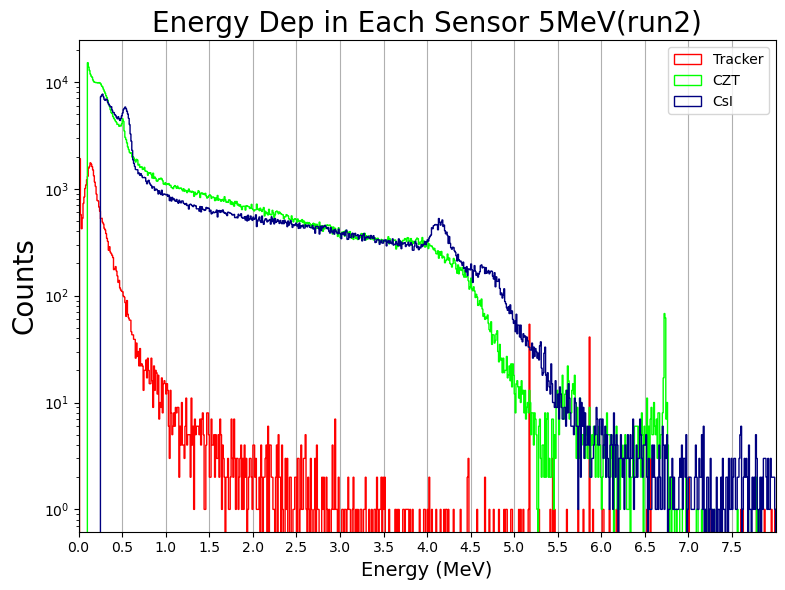

In [21]:
# Combined
plt.rcParams["figure.figsize"] = [8, 6]  
plt=reload(plt)
trk_hist, a, b= plt.hist(np.array(Trk_nrg_list_ind)/1000.0, bins=n_bins, range=(e_min/1000.0, e_max/1000.0), label='Tracker', histtype = 'step',color='red')
czt_hist, a, b=plt.hist(np.array(Czt_nrg_list_ind)/1000.0, bins=n_bins, range=(e_min/1000.0, e_max/1000.0), label='CZT', histtype = 'step', color='lime')
csi_hist, a, b= plt.hist(np.array(Csi_nrg_list_ind)/1000.0, bins=n_bins, range=(e_min/1000.0, e_max/1000.0), label='CsI', histtype = 'step',color='navy')

plt.xlabel("Energy (MeV)", size=14)
plt.ylabel(y_label, size=20)
plt.title(f"Energy Dep in Each Sensor {nrg}({run})", size = 20)
plt.xlim(xlim_min/1000.0,xlim_max/1000.0)
#plt.ylim(0,2000)
plt.yscale('log')
plt.tight_layout()
plt.grid(axis = 'x')
plt.xticks(np.arange(0,xlim_max/1000.0,0.5))
plt.legend()
plt.savefig(f"{fpath}NrgDep_Ind_{run}_{nrg}MeV_log_head.jpeg")

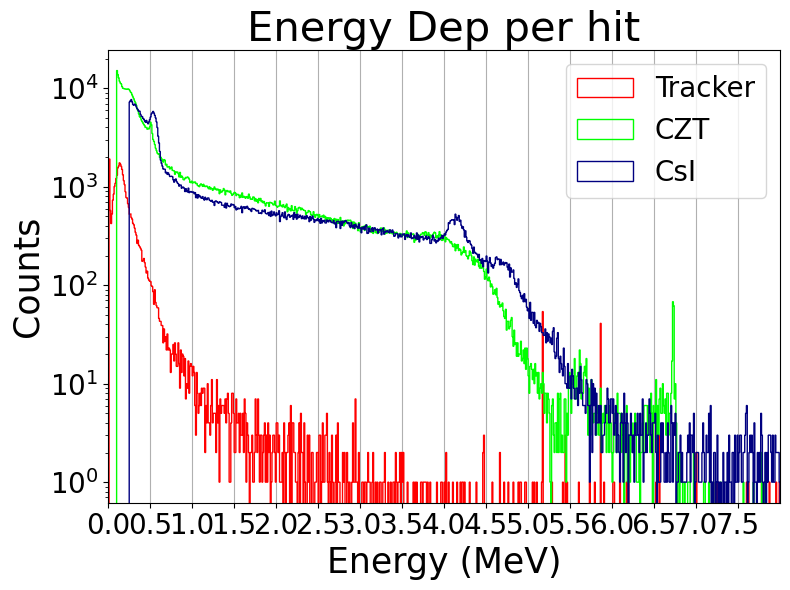

In [20]:
# Combined
plt.rcParams["figure.figsize"] = [8,6]  
plt=reload(plt)
trk_hist, a, b= plt.hist(np.array(Trk_nrg_list_ind)/1000.0, bins=n_bins, range=(e_min/1000.0, e_max/1000.0), label='Tracker', histtype = 'step',color='red')
czt_hist, a, b=plt.hist(np.array(Czt_nrg_list_ind)/1000.0, bins=n_bins, range=(e_min/1000.0, e_max/1000.0), label='CZT', histtype = 'step', color='lime')
csi_hist, a, b= plt.hist(np.array(Csi_nrg_list_ind)/1000.0, bins=n_bins, range=(e_min/1000.0, e_max/1000.0), label='CsI', histtype = 'step',color='navy')

plt.xlabel("Energy (MeV)", size=25)
plt.ylabel(y_label, size=25)
plt.title(f"Energy Dep per hit", size = 30)
plt.xlim(xlim_min/1000.0,xlim_max/1000.0)
#plt.ylim(0,2000)
plt.yscale('log')
plt.tight_layout()
plt.grid(axis = 'x')
plt.xticks(np.arange(0,xlim_max/1000.0,0.5))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.tight_layout()
plt.savefig(f"{fpath}NrgDep_Ind_{run}_{nrg}MeV_log_head.jpeg")

## <font color='navy'> Total Energy Deposited

In [22]:
Tot_nrg_list = []
#Tot_nrg_list_a = []
#Tot_nrg_list_b = []
#Tot_nrg_list_c = []

Trk_nrg_list = []
Czt_nrg_list = []
Csi_nrg_list = []

#counter1 = 0

for i in range(n_evts):
#for i in range(10):
    delme_nrg = 0.0
    
    #Tracker
    temp_nrg = Trk_nrg_sum_arr[i]
    if temp_nrg > 0.0:
        temp_nrg = temp_nrg/2.0 
        Trk_nrg_list.append(temp_nrg)
        delme_nrg += temp_nrg
    
    # CZT
    temp_nrg = Czt_nrg_sum_arr[i]
    if temp_nrg > 0.0:
        temp_czt_tot = np.sum(temp_nrg)
        Czt_nrg_list.append(temp_czt_tot)
        delme_nrg += temp_nrg       
    
    #if delme_nrg >0:
        #Tot_nrg_list_a.append(delme_nrg)        # this is only trk and czt
    
    # CSI
    temp_nrg = Csi_nrg_sum_arr[i]
    if temp_nrg > 0.0:
        temp_csi_tot = np.sum(temp_nrg)
        Csi_nrg_list.append(temp_csi_tot)        
        delme_nrg += temp_nrg  
    
    if delme_nrg > 0:
        Tot_nrg_list.append(delme_nrg)


### <font color='brown'> Plot : Energy Deposited Total

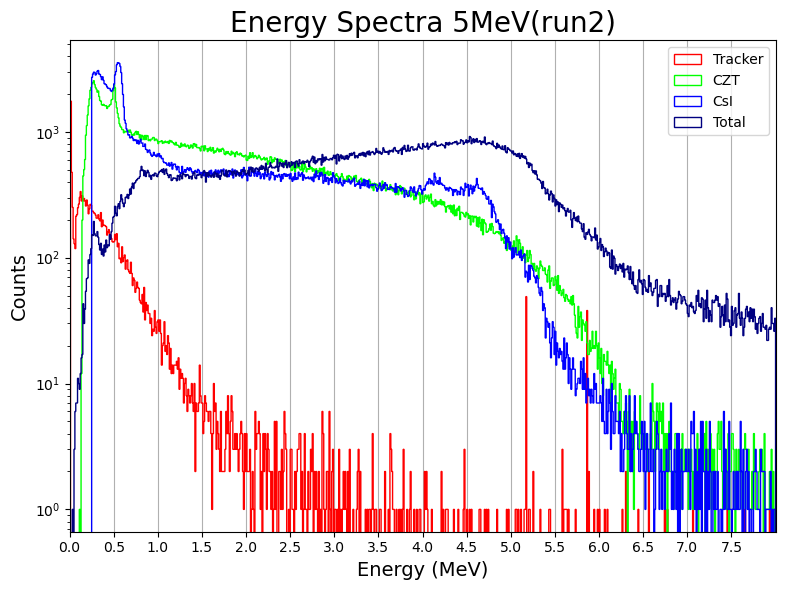

In [25]:
plt.rcParams["figure.figsize"] = [8, 6]  
# Combined
plt=reload(plt)
#lt.figure(figsize=(8,6))
trk_hist, a, b= plt.hist(np.array(Trk_nrg_list)/1000.0, bins=n_bins, range=(e_min/1000.0, e_max/1000.0), label='Tracker', histtype = 'step',color='red')
czt_hist, a, b=plt.hist(np.array(Czt_nrg_list)/1000.0, bins=n_bins, range=(e_min/1000.0, e_max/1000.0), label='CZT', histtype = 'step', color='lime')
csi_hist, a, b= plt.hist(np.array(Csi_nrg_list)/1000.0, bins=n_bins, range=(e_min/1000.0, e_max/1000.0), label='CsI', histtype = 'step',color='blue')

plt.hist(np.array(Tot_nrg_list)/1000.0, bins=n_bins, range=(e_min/1000.0, e_max/1000.0),histtype = 'step',label='Total', color='navy')

#test_t = trk_hist+czt_hist+csi_hist

#lt.rcParams["figure.figsize"] = [6, 8]
plt.xlabel("Energy (MeV)", size=14)
plt.ylabel(y_label, size=14)
plt.title(p_title, size = 20)
plt.xlim(xlim_min/1000.0,xlim_max/1000.0)
#plt.ylim(0,2000)
plt.yscale('log')
plt.tight_layout()
plt.grid(axis = 'x')
plt.xticks(np.arange(0,xlim_max/1000.0,0.5))
plt.legend()
plt.savefig(f"{fpath}NrgDep_Total_{run}_{nrg}MeV_log.jpeg")

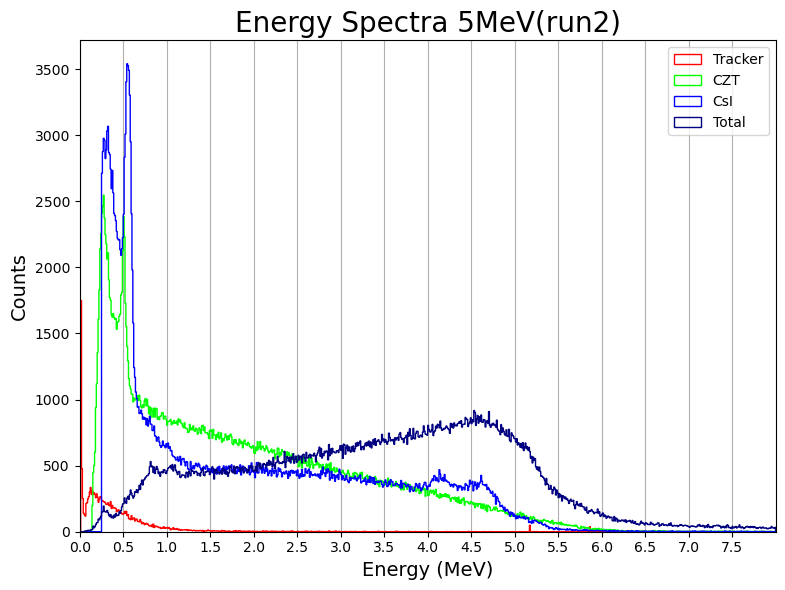

In [24]:
plt.rcParams["figure.figsize"] = [8, 6]   
# Combined
plt=reload(plt)
#plt.figure(figsize=(8,6))
trk_hist, a, b= plt.hist(np.array(Trk_nrg_list)/1000.0, bins=n_bins, range=(e_min/1000.0, e_max/1000.0), label='Tracker', histtype = 'step',color='red')
czt_hist, a, b=plt.hist(np.array(Czt_nrg_list)/1000.0, bins=n_bins, range=(e_min/1000.0, e_max/1000.0), label='CZT', histtype = 'step', color='lime')
csi_hist, a, b= plt.hist(np.array(Csi_nrg_list)/1000.0, bins=n_bins, range=(e_min/1000.0, e_max/1000.0), label='CsI', histtype = 'step',color='blue')

plt.hist(np.array(Tot_nrg_list)/1000.0, bins=n_bins, range=(e_min/1000.0, e_max/1000.0),histtype = 'step',label='Total', color='navy')

#test_t = trk_hist+czt_hist+csi_hist

#plt.rcParams["figure.figsize"] = [6, 8]
plt.xlabel("Energy (MeV)", size=14)
plt.ylabel(y_label, size=14)
plt.title(p_title, size = 20)
plt.xlim(xlim_min/1000.0,xlim_max/1000.0)
#plt.ylim(0,2000)
#plt.yscale('log')
plt.tight_layout()
plt.grid(axis = 'x')
plt.xticks(np.arange(0,xlim_max/1000.0,0.5))
plt.legend()
plt.savefig(f"{fpath}NrgDep_Total_{run}_{nrg}MeV.jpeg")

## <font color='brown'> Plot: All together

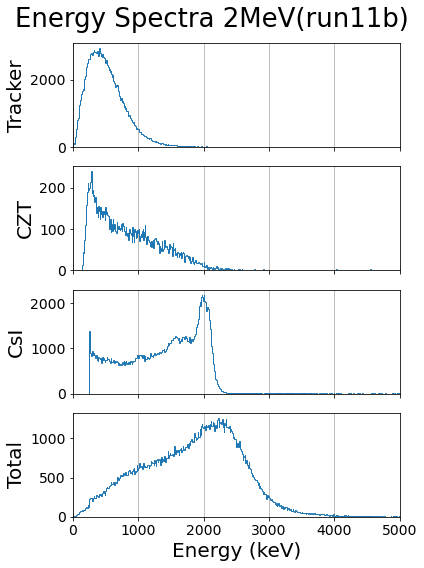

In [129]:
plt.rcParams["figure.figsize"] = [6, 8]   
fig, ax =  plt.subplots(4, sharex=True)

ax[0].hist(Trk_nrg_list, bins=n_bins, range=(e_min, e_max), label='Tracker', histtype='step')
ax[0].set_ylabel("Tracker", fontsize=20)

ax[1].hist(Czt_nrg_list, bins=n_bins, range=(e_min, e_max), label='CZT', histtype='step')
ax[1].set_ylabel("CZT", fontsize=20)

ax[2].hist(Csi_nrg_list, bins=n_bins, range=(e_min, e_max), label='CsI', histtype='step')
ax[2].set_ylabel("CsI", fontsize=20)

ax[3].hist(Tot_nrg_list, bins=n_bins, range=(e_min, e_max),histtype = 'step',label='Total')
ax[3].set_ylabel("Total", fontsize=20)

for axs in ax:
    axs.tick_params(axis='y', labelsize=14)
    axs.tick_params(axis='x', labelsize=14)
    axs.grid(axis='x')

plt.xlim(xlim_min,xlim_max)
#plt.xlim(0,7000)
plt.xlabel(x_label,fontsize='20')
fig.suptitle(f"{p_title}", size = 26)
plt.tight_layout()    
plt.savefig(f"{fpath}{p_title}.jpeg")

## <font color='brown'> Plot: Total Energy

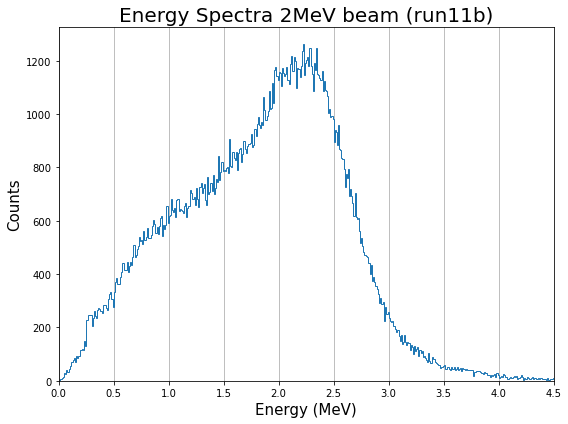

In [130]:
plt.rcParams["figure.figsize"] = [8, 6]
tot_hist, a, b = plt.hist(np.array(Tot_nrg_list)/1000.0, bins=n_bins, range=(e_min/1000.0, e_max/1000.0),histtype = 'step')
plt.xlabel('Energy (MeV)', fontsize='15')
plt.ylabel(y_label, fontsize='15')
plt.title(f'Energy Spectra {nrg} beam ({run})',fontsize='20')
plt.xlim(xlim_min/1000.0,3.5)
#plt.xlim(0,7000)

plt.tight_layout()
plt.grid(axis = 'x')
plt.xticks(np.arange(0,xlim_max/1000.0,0.5))
plt.savefig(f"{fpath}summed_{run}.jpeg")

## <font color='brown'> Plot: EventID

In [131]:
file['Events/TKR/EventID'], file['Events/CZT/EventID'], file['Events/CsI/EventID/EventID']

(<HDF5 dataset "EventID": shape (210723,), type "<u4">,
 <HDF5 dataset "EventID": shape (210723,), type "<u4">,
 <HDF5 dataset "EventID": shape (210723,), type "<i8">)

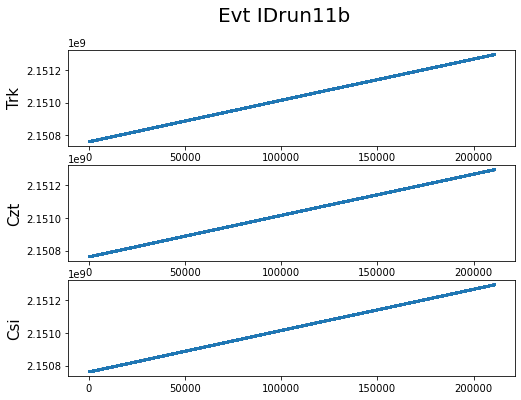

In [132]:
plt.rcParams["figure.figsize"] = [8, 6]  

fig, ax =  plt.subplots(3)

trk_id = file['Events/TKR/EventID'][...]
ax[0].scatter(np.arange(len(trk_id)),trk_id,marker='.',s=1)
ax[0].set_ylabel('Trk', fontsize='15')

czt_id = file['Events/CZT/EventID'][...]
ax[1].scatter(np.arange(len(czt_id)),czt_id,marker='.',s=1)
ax[1].set_ylabel('Czt', fontsize='15')

csi_id = file['Events/CsI/EventID/EventID'][...]
ax[2].scatter(np.arange(len(csi_id)),csi_id,marker='.',s=1)
ax[2].set_ylabel('Csi', fontsize='15')

plt.suptitle(f'Evt ID{run}', size=20)

plt.savefig(f"{fpath}gen_scatter_eventid_{run}_a1.jpeg")

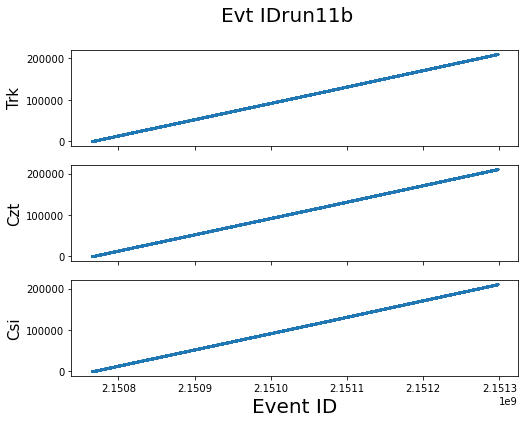

In [133]:
plt.rcParams["figure.figsize"] = [8, 6]  

fig, ax =  plt.subplots(3, sharex=True)

trk_id = file['Events/TKR/EventID'][...]
ax[0].scatter(trk_id,np.arange(len(trk_id)),marker='.',s=1)
ax[0].set_ylabel('Trk', fontsize='15')

czt_id = file['Events/CZT/EventID'][...]
ax[1].scatter(czt_id,np.arange(len(czt_id)),marker='.',s=1)
ax[1].set_ylabel('Czt', fontsize='15')

csi_id = file['Events/CsI/EventID/EventID'][...]
ax[2].scatter(csi_id,np.arange(len(csi_id)),marker='.',s=1)
ax[2].set_ylabel('Csi', fontsize='15')

plt.suptitle(f'Evt ID{run}', size=20)
plt.xlabel('Event ID',fontsize='20')
plt.savefig(f"{fpath}gen_scatter_eventid_{run}_a2.jpeg")

## <font color='brown'> Plot: Scatter: Tot dep vs Evt ID

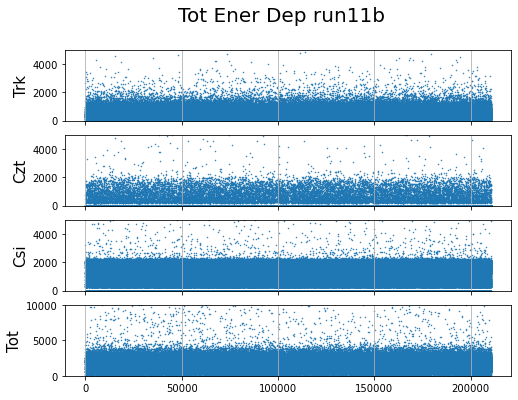

In [134]:
    
plt.rcParams["figure.figsize"] = [8, 6]  
max_ener = max_nrg_sel

total_nrg_sum_arr = Czt_nrg_sum_arr+Csi_nrg_sum_arr+(Trk_nrg_sum_arr/2.0)
fig, ax =  plt.subplots(4, sharex=True)

#Trk_evtid = file['Events/TKR/EventID'][...]
ax[0].scatter(np.arange(len(Trk_nrg_sum_arr)),Trk_nrg_sum_arr/2.0,marker='.',s=1)
ax[0].set_ylabel('Trk', fontsize='15')

#Czt_evtid= file['Events/CZT/EventID'][...]
ax[1].scatter(np.arange(len(Czt_nrg_sum_arr)),Czt_nrg_sum_arr,marker='.',s=1)
ax[1].set_ylabel('Czt', fontsize='15')

#Csi_evtid = file['Events/CsI/EventID/EventID'][...]
ax[2].scatter(np.arange(len(Csi_nrg_sum_arr)),Csi_nrg_sum_arr,marker='.',s=1)
ax[2].set_ylabel('Csi', fontsize='15')

for axs in ax:
    axs.set_ylim(0,max_ener)
    #axs.set_xlim(0,max(xvar))
    axs.grid(axis = 'x')    
    #axs.set_xticks(np.arange(0,max(xvar),20000))
    
ax[3].scatter(np.arange(len(Csi_nrg_sum_arr)),total_nrg_sum_arr,marker='.',s=1)
ax[3].set_ylim(0,2*max_ener)
ax[3].set_ylabel('Tot',fontsize='15')


#plt.xlabel('Event ID',fontsize='20')
plt.suptitle(f'Tot Ener Dep {run}', size=20)

plt.savefig(f"{fpath}gen_scatter_{run}_a.jpeg")

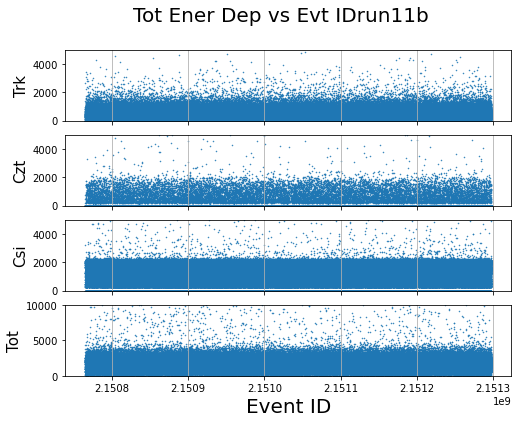

In [135]:
#plt.rcParams["figure.figsize"] = [12, 6]
max_ener = max_nrg_sel

total_nrg_sum_arr = Czt_nrg_sum_arr+Csi_nrg_sum_arr+(Trk_nrg_sum_arr/2.0)
fig, ax =  plt.subplots(4, sharex=True)

Trk_evtid = file['Events/TKR/EventID'][...]
ax[0].scatter(Trk_evtid,Trk_nrg_sum_arr/2.0,marker='.',s=1)
ax[0].set_ylabel('Trk', fontsize='15')

Czt_evtid= file['Events/CZT/EventID'][...]
ax[1].scatter(Czt_evtid,Czt_nrg_sum_arr,marker='.',s=1)
ax[1].set_ylabel('Czt', fontsize='15')

Csi_evtid = file['Events/CsI/EventID/EventID'][...]
ax[2].scatter(Csi_evtid,Csi_nrg_sum_arr,marker='.',s=1)
ax[2].set_ylabel('Csi', fontsize='15')

for axs in ax:
    axs.set_ylim(0,max_ener)
    #axs.set_xlim(0,max(xvar))
    axs.grid(axis = 'x')    
    #axs.set_xticks(np.arange(0,max(xvar),20000))
    
plt.rcParams["figure.figsize"] = [5,6]    
ax[3].scatter(Csi_evtid,total_nrg_sum_arr,marker='.',s=1)
ax[3].set_ylim(0,2*max_ener)
ax[3].set_ylabel('Tot',fontsize='15')


plt.xlabel('Event ID',fontsize='20')
plt.suptitle(f'Tot Ener Dep vs Evt ID{run}', size=20)

plt.savefig(f"{fpath}gen_scatter_{run}_b.jpeg")


## <font color='brown'> Plot: Scatter: Dep vs Evt Time

In [136]:
file['Events/CZT'].keys()

<KeysViewHDF5 ['ASICTemp', 'AnodePulseheight', 'AnodeTime', 'CathodePulseheight', 'CathodeTime', 'CorUTC', 'Energy', 'EventID', 'EventTime', 'PadPulseheight', 'Position']>

In [137]:
file['Events/CZT/CorUTC']

<HDF5 dataset "CorUTC": shape (210723,), type "<f8">

In [138]:
len(Czt_nrg_sum_arr)

210723

In [139]:
file['Events/TKR/EventID'][...]

array([2150765051, 2150765052, 2150765053, ..., 2151297474, 2151297475,
       2151297476], dtype=uint32)

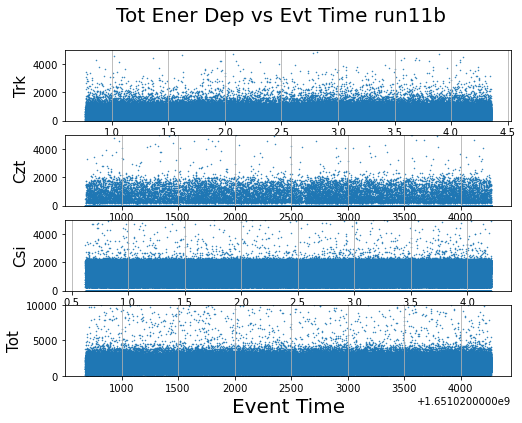

In [140]:
plt.rcParams["figure.figsize"] = [8, 6]  
max_ener = max_nrg_sel

total_nrg_sum_arr = Czt_nrg_sum_arr+Csi_nrg_sum_arr+(Trk_nrg_sum_arr/2.0)
trk_time = file['Events/TKR/EventTime'][...]
fig, ax =  plt.subplots(4)

ax[0].scatter(trk_time,Trk_nrg_sum_arr/2.0,marker='.',s=1)
ax[0].set_ylabel('Trk', fontsize='15')

czt_time = file['Events/CZT/CorUTC'][...]
#ax[1].scatter(czt_time,np.arange(len(czt_time)),marker='.',s=1)
ax[1].scatter(czt_time,Czt_nrg_sum_arr,marker='.',s=1)
ax[1].set_ylabel('Czt', fontsize='15')

csi_time = file['Events/CsI/time/UTC'][...]
ax[2].scatter(csi_time,Csi_nrg_sum_arr,marker='.',s=1)
ax[2].set_ylabel('Csi', fontsize='15')

for axs in ax:
    axs.set_ylim(0,max_ener)
    #axs.set_xlim(0,max(xvar))
    axs.grid(axis = 'x')    
    #axs.set_xticks(np.arange(0,max(xvar),20000))
    
plt.rcParams["figure.figsize"] = [12, 6]    
ax[3].scatter(czt_time,total_nrg_sum_arr,marker='.',s=1)
ax[3].set_ylim(0,2*max_ener)
ax[3].set_ylabel('Tot',fontsize='15')


plt.xlabel('Event Time',fontsize='20')
plt.suptitle(f'Tot Ener Dep vs Evt Time {run}', size=20)

plt.savefig(f"{fpath}gen_scatter_nrg_vs_time{run}_a.jpeg")

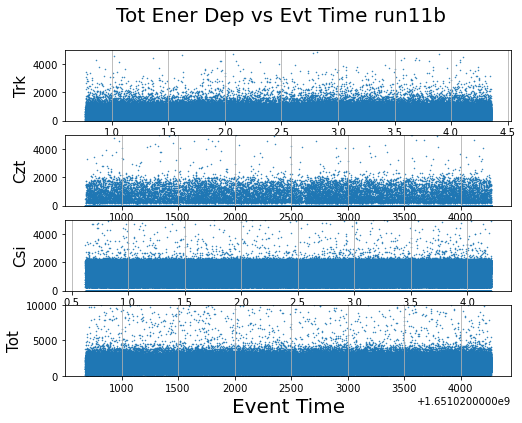

In [141]:
plt.rcParams["figure.figsize"] = [8, 6]  
max_ener = max_nrg_sel

total_nrg_sum_arr = Czt_nrg_sum_arr+Csi_nrg_sum_arr+(Trk_nrg_sum_arr/2.0)
trk_time = file['Events/TKR/EventTime'][...]
fig, ax =  plt.subplots(4)

ax[0].scatter(trk_time,Trk_nrg_sum_arr/2.0,marker='.',s=1)
ax[0].set_ylabel('Trk', fontsize='15')

czt_time = file['Events/CZT/CorUTC'][...]
#ax[1].scatter(czt_time,np.arange(len(czt_time)),marker='.',s=1)
ax[1].scatter(czt_time,Czt_nrg_sum_arr,marker='.',s=1)
ax[1].set_ylabel('Czt', fontsize='15')

csi_time = file['Events/CsI/time/UTC'][...]
ax[2].scatter(csi_time,Csi_nrg_sum_arr,marker='.',s=1)
ax[2].set_ylabel('Csi', fontsize='15')

for axs in ax:
    axs.set_ylim(0,max_ener)
    #axs.set_xlim(0,max(xvar))
    axs.grid(axis = 'x')    
    #axs.set_xticks(np.arange(0,max(xvar),20000))
    
plt.rcParams["figure.figsize"] = [12, 6]    
ax[3].scatter(czt_time,total_nrg_sum_arr,marker='.',s=1)
ax[3].set_ylim(0,2*max_ener)
ax[3].set_ylabel('Tot',fontsize='15')


plt.xlabel('Event Time',fontsize='20')
plt.suptitle(f'Tot Ener Dep vs Evt Time {run}', size=20)

plt.savefig(f"{fpath}gen_scatter_nrg_vs_time{run}_b.jpeg")

Event ID

In [142]:
file['Events/CsI/EventID'].keys()

<KeysViewHDF5 ['EventID']>

Time 

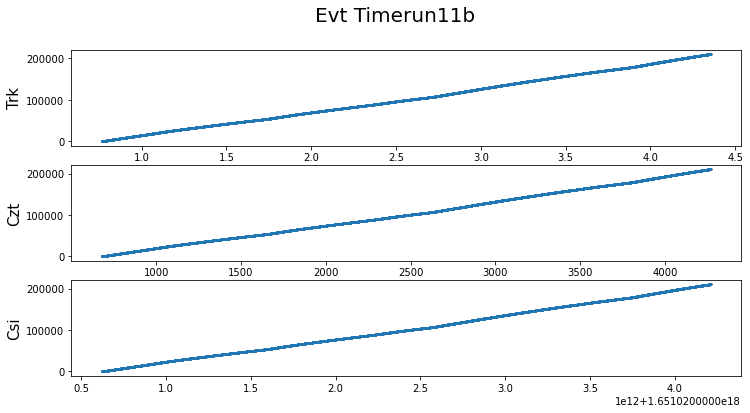

In [143]:
plt.rcParams["figure.figsize"] = [12, 6]

trk_time = file['Events/TKR/EventTime'][...]
fig, ax =  plt.subplots(3)


ax[0].scatter(trk_time,np.arange(len(trk_time)),marker='.',s=1)
ax[0].set_ylabel('Trk', fontsize='15')

czt_time = file['Events/CZT/CorUTC'][...]
ax[1].scatter(czt_time,np.arange(len(czt_time)),marker='.',s=1)
ax[1].set_ylabel('Czt', fontsize='15')

csi_time = file['Events/CsI/time/UTC'][...]
ax[2].scatter(csi_time,np.arange(len(csi_time)),marker='.',s=1)
ax[2].set_ylabel('Csi', fontsize='15')

#ax[3].set_ylabel('Count',fontsize='15')


#plt.xlabel('Event ID',fontsize='20')
plt.suptitle(f'Evt Time{run}', size=20)

plt.savefig(f"{fpath}gen_scatter_eventtime_{run}_a.jpeg")

In [144]:
np.min(csi_time)

1.6510206220042762e+18

In [145]:
np.max(csi_time)

1.6510242115904445e+18

# Individual Subsystem Plots

## <font color='brown'> Plot: Tracker

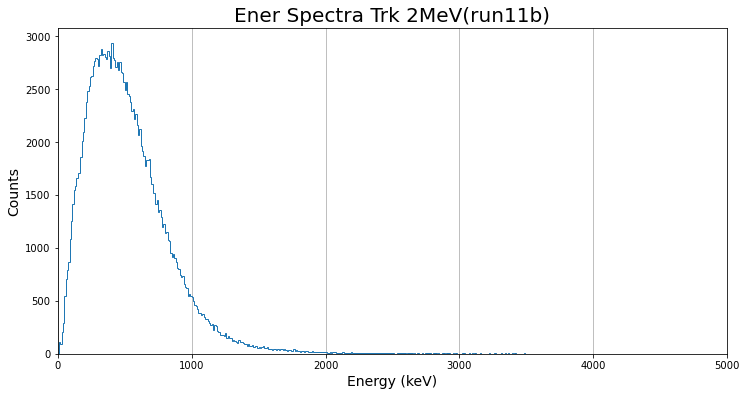

In [146]:
#fig = plt.hist(Trk_nrg_sum_arr,bins=n_bins,range=(e_min, e_max),label='Trk', histtype='step')
fig = plt.hist(Trk_nrg_list,bins=n_bins,range=(e_min, e_max),label='Trk', histtype='step')

t_title = f"Ener Spectra Trk {nrg}({run})"
plt.title(t_title, size = 20)
plt.xlabel(x_label, size=14)
plt.ylabel(y_label, size=14)
plt.rcParams["figure.figsize"] = [8, 6]
plt.xlim(0,max_nrg_sel)
plt.grid(axis = 'x')
plt.savefig(f"{fpath}Spec_Trk_{run}.jpeg")

## <font color='brown'> Plot: CZT

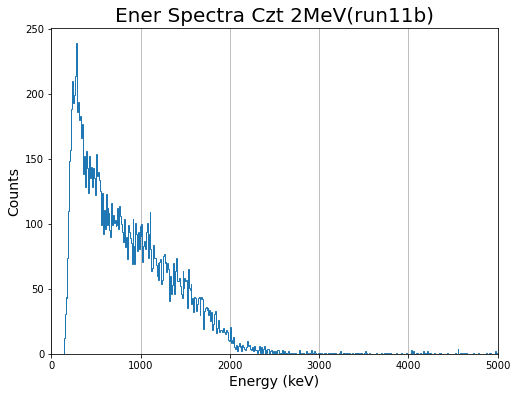

In [147]:
fig = plt.hist(Czt_nrg_list,bins=n_bins,range=(e_min, e_max),label='Czt', histtype='step')

t_title = f"Ener Spectra Czt {nrg}({run})"
plt.title(t_title, size = 20)
plt.xlabel(x_label, size=14)
plt.ylabel(y_label, size=14)
plt.rcParams["figure.figsize"] = [8, 6]
plt.xlim(0,max_nrg_sel)
plt.grid(axis = 'x')
plt.savefig(f"{fpath}Spec_Czt_{run}.jpeg")

## <font color='brown'> Plot: CSI

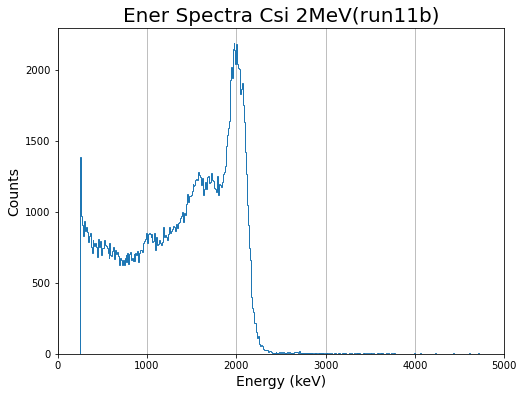

In [148]:
fig = plt.hist(Csi_nrg_sum_arr,bins=n_bins,range=(e_min, e_max),label='Csi', histtype='step')

t_title = f"Ener Spectra Csi {nrg}({run})"
plt.title(t_title, size = 20)
plt.xlabel(x_label, size=14)
plt.ylabel(y_label, size=14)
plt.rcParams["figure.figsize"] = [8, 6]
plt.xlim(0,max_nrg_sel)
plt.grid(axis = 'x')
plt.savefig(f"{fpath}Spec_Csi_{run}.jpeg")

## <font color='brown'> Plot: CSI Mev

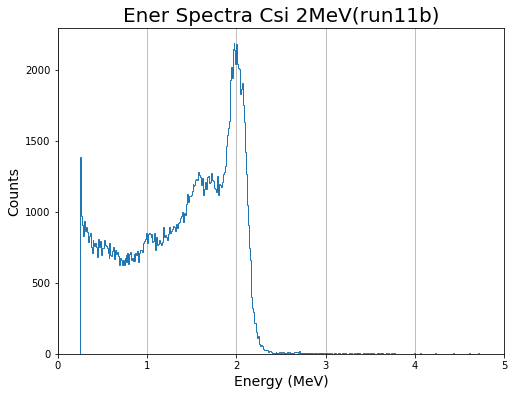

In [149]:
fig = plt.hist(Csi_nrg_sum_arr/1000.00,bins=n_bins,range=(e_min/1000.0, e_max/1000.0),label='Csi', histtype='step')

t_title = f"Ener Spectra Csi {nrg}({run})"
plt.title(t_title, size = 20)
plt.xlabel('Energy (MeV)', size=14)
plt.ylabel(y_label, size=14)
plt.rcParams["figure.figsize"] = [8, 6]
plt.xlim(0,max_nrg_sel/1000.00)
plt.grid(axis = 'x')
plt.savefig(f"{fpath}Spec_Csi_{run}_mev.jpeg")

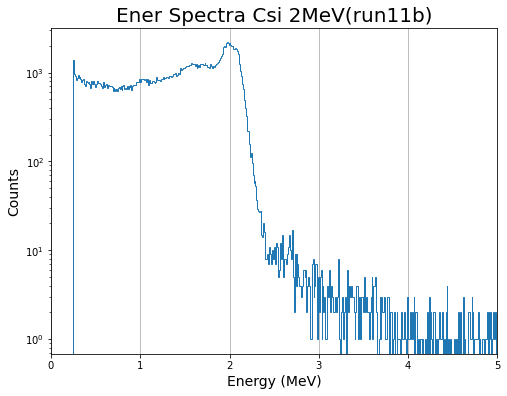

In [150]:
fig = plt.hist(Csi_nrg_sum_arr/1000.00,bins=n_bins,range=(e_min/1000.0, e_max/1000.0),label='Csi', histtype='step')

t_title = f"Ener Spectra Csi {nrg}({run})"
plt.title(t_title, size = 20)
plt.xlabel('Energy (MeV)', size=14)
plt.ylabel(y_label, size=14)
plt.rcParams["figure.figsize"] = [8, 6]
plt.xlim(0,max_nrg_sel/1000.00)
plt.grid(axis = 'x')
plt.yscale('log')
plt.savefig(f"{fpath}Spec_Csi_{run}_mev_log.jpeg")

# <font color='blue'> Bivariate Plot

## <font color='brown'> Plot: CZT + CSI

In [164]:
bivar = 2100
n_bins

499

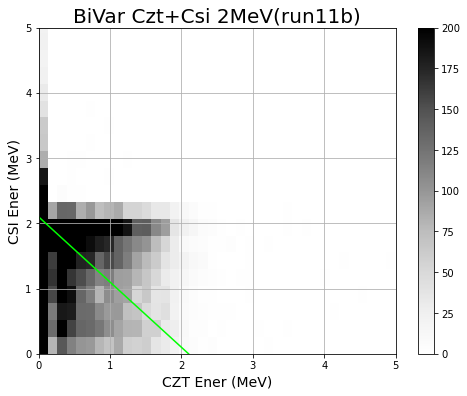

In [165]:
plt.rcParams["figure.figsize"] = [8, 6]
fig = plt.hist2d(Czt_nrg_sum_arr/1000.0, Csi_nrg_sum_arr/1000.0, bins=(n_bins, n_bins), cmap='Greys', vmax=200)
plt.xlim(0,max_ener/1000.0)
plt.ylim(0,max_ener/1000.0)
plt.colorbar()

t_title = f"BiVar Czt+Csi {nrg}({run})"
plt.title(t_title, size = 20)

plt.xlabel('CZT Ener (MeV)', size=14)
plt.ylabel('CSI Ener (MeV)', size=14)
#plt.set_aspect = 'equal'
plt.plot([0, bivar/1000.0], [bivar/1000.0, 0],color="lime")
plt.grid(axis = 'x')
plt.grid(axis = 'y')
plt.savefig(f"{fpath}bivar_cztcsi_{run}.jpeg")

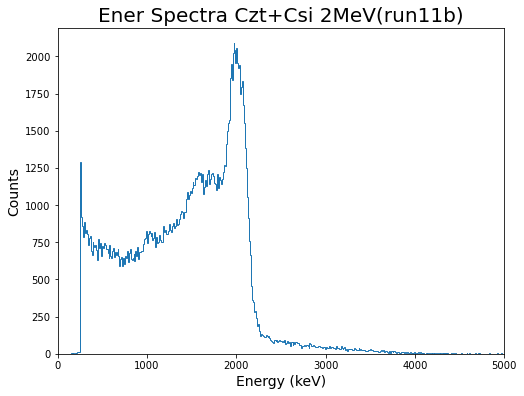

In [166]:
cztcsi_nrg_arr = Czt_nrg_sum_arr + Csi_nrg_sum_arr
fig = plt.hist(cztcsi_nrg_arr,bins=n_bins,range=(e_min, e_max),label='Czt+Csi', histtype='step')

t_title = f"Ener Spectra Czt+Csi {nrg}({run})"
plt.title(t_title, size = 20)
plt.xlabel(x_label, size=14)
plt.ylabel(y_label, size=14)

plt.xlim(0,max_ener)

plt.savefig(f"{fpath}Ener_Spectra_cztcsi_{run}.jpeg")

## <font color='brown'> Plot: CZT + Tracker

In [154]:
binEnergyStep = 10
MIN_ADC = 0
MAX_ADC = max_ener
energyEdges = np.linspace(MIN_ADC, MAX_ADC, int((MAX_ADC-MIN_ADC)/binEnergyStep)  )
#energyEdges

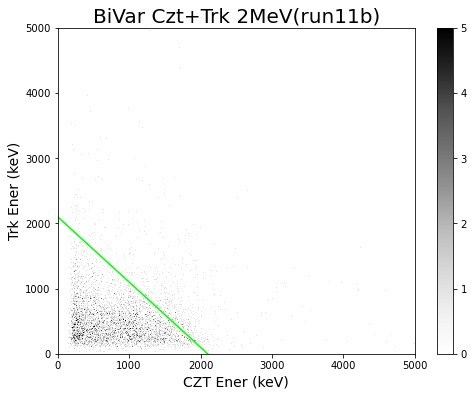

In [155]:
fig = plt.hist2d(Czt_nrg_sum_arr, Trk_nrg_sum_arr, bins=(n_bins, n_bins),range=((e_min, e_max),(e_min, e_max)), cmap='Greys',vmax=5)

plt.xlim(0,max_ener)
plt.ylim(0,max_ener)
plt.colorbar()

t_title = f"BiVar Czt+Trk {nrg}({run})"
plt.title(t_title, size = 20)
plt.rcParams["figure.figsize"] = [8, 6]
plt.xlabel('CZT Ener (keV)', size=14)
plt.ylabel('Trk Ener (keV)', size=14)
#plt.set_aspect = 'equal'
plt.plot([0, bivar], [bivar, 0],color="lime")

plt.savefig(f"{fpath}bivar_czttrk_{run}.jpeg")


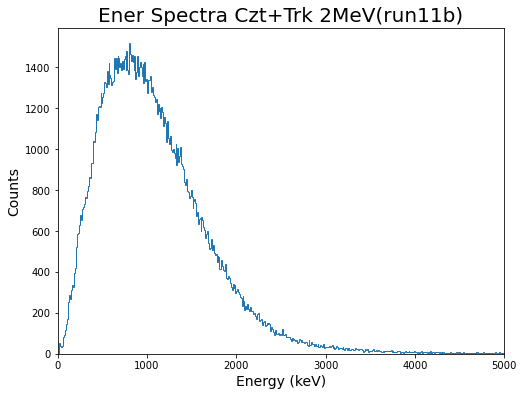

In [156]:
czttrk_nrg_arr = Czt_nrg_sum_arr + Trk_nrg_sum_arr
fig = plt.hist(czttrk_nrg_arr,bins=n_bins,range=(e_min, e_max),label='Czt+Trk', histtype='step')

t_title = f"Ener Spectra Czt+Trk {nrg}({run})"
plt.title(t_title, size = 20)
plt.xlabel(x_label, size=14)
plt.ylabel(y_label, size=14)

plt.xlim(0,max_ener)
plt.savefig(f"{fpath}Ener_Spectra_czttrk_{run}.jpeg")

## <font color='brown'> Plot:  TRK + CSI

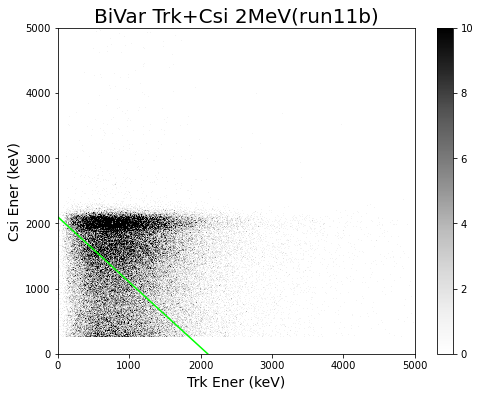

In [157]:
fig = plt.hist2d(Trk_nrg_sum_arr, Csi_nrg_sum_arr, bins=(n_bins, n_bins),range=((e_min, e_max),(e_min, e_max)), cmap='Greys',vmax=10)

plt.xlim(0,max_ener)
plt.ylim(0,max_ener)
plt.colorbar()

t_title = f"BiVar Trk+Csi {nrg}({run})"
plt.title(t_title, size = 20)
plt.rcParams["figure.figsize"] = [8, 6]
plt.xlabel('Trk Ener (keV)', size=14)
plt.ylabel('Csi Ener (keV)', size=14)
#plt.set_aspect = 'equal'
plt.plot([0, bivar], [bivar, 0],color="lime")

plt.savefig(f"{fpath}bivar_trkcsi_{run}.jpeg")

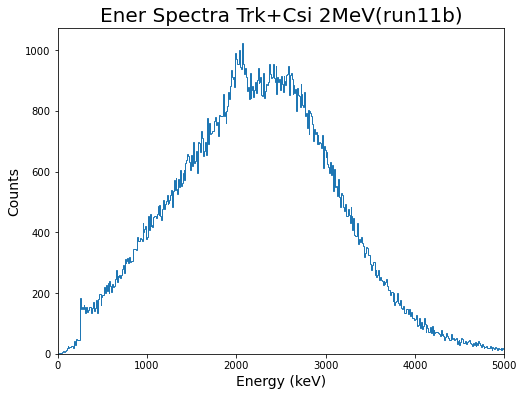

In [158]:
trkcsi_nrg_arr = Trk_nrg_sum_arr + Csi_nrg_sum_arr
fig = plt.hist(trkcsi_nrg_arr,bins=n_bins,range=(e_min, e_max),label='Trk+Csi', histtype='step')

t_title = f"Ener Spectra Trk+Csi {nrg}({run})"
plt.title(t_title, size = 20)
plt.xlabel(x_label, size=14)
plt.ylabel(y_label, size=14)

plt.xlim(0,max_ener)
#plt.xlim(0,4000)
plt.savefig(f"{fpath}Ener_Spectra_trkcsi_{run}.jpeg")

# <font color='blue'>Fitting the plot

### Mid x-value

In [159]:
temp_x = np.linspace(e_min, e_max, n_bins)
#for i in range(len(tot_hist)):
x_data= []
for i in range(len(temp_x)):
    xmid = (a[i]+a[i+1])/2.0
    x_data.append(xmid)

print(len(x_data))
print(len(temp_x))


499
499


### function

In [57]:
def gaussian_func(x, a, b, c):
    return a*np.exp(-np.power(x - b, 2)/(2*np.power(c , 2)))

### starting values

In [ ]:
##### Estimates
amplitude = 1000
mean = 2100
SD = 100

### Fitting and plot

In [ ]:
tot_hist, a, b = plt.hist(Tot_nrg_list, bins=n_bins, range=(e_min, e_max),histtype = 'step')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(f'Summed Total {nrg}({run})')
#plt.xlim(xlim_min,xlim_max)
plt.rcParams["figure.figsize"] = [8, 6]


print(len(x_data))
print(len(tot_hist))

pars, pcov = curve_fit(f=gaussian_func, xdata=x_data, ydata=tot_hist, p0=[amplitude,mean,SD])
y_gauss = gaussian_func(x_data, pars[0], pars[1], pars[2])

plt.plot(x_data, y_gauss,'r--');                  
plt.grid(axis = 'x')
print(pars)

In [ ]:
#%matplotlib qt
tot_hist, a, b = plt.hist(Tot_nrg_list, bins=n_bins, range=(e_min, e_max),histtype = 'step', label='beam data')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(f'Summed Total {nrg}({run})')
plt.xlim(xlim_min,xlim_max)
plt.rcParams["figure.figsize"] = [10, 8]

# Narrow fit

low_x = 190
hi_x = 220

x_data1 = x_data[low_x:hi_x] 
y_data1 = tot_hist[low_x:hi_x] 

pars, pcov = curve_fit(f=gaussian_func, xdata=x_data1, ydata=y_data1, p0=[amplitude,mean,SD])
y_gauss1 = gaussian_func(x_data1, pars[0], pars[1], pars[2])
perr = np.sqrt(np.diag(pcov))
plt.plot(x_data1, y_gauss1,'r--', label=f'Gauss fit: a={pars[0]:5.1f} ({perr[0]:3.1f}) , b={pars[1]:5.1f} ({perr[1]:3.1f}), c={pars[2]:5.1f} ({perr[2]:3.1f})') 
print(pars)
print(perr)
plt.xlabel(x_label, fontsize='15')
plt.ylabel(y_label, fontsize='15')
plt.title(f'Summed Total {nrg}({run})',fontsize='20')
plt.legend()
plt.grid(axis = 'x')
plt.savefig(f"{fpath}tot_fitted_{run}.jpeg")

# Investigate

## <mark> <font color='red'> Gain Issue

In [ ]:
plt.rcParams["figure.figsize"] = [12, 6]
max_ener = max_nrg_sel

total_nrg_sum_arr = Czt_nrg_sum_arr/1000.0 +Csi_nrg_sum_arr/1000.0 +Trk_nrg_sum_arr/2000.0 
xvar = np.arange(n_evts)
fig, ax =  plt.subplots(4, sharex=True)

ax[0].scatter(xvar,Trk_nrg_sum_arr/2000.0,marker='.',s=1)
ax[0].set_ylabel('Trk', fontsize='15')

ax[1].scatter(xvar,Czt_nrg_sum_arr/1000.0,marker='.',s=1)
ax[1].set_ylabel('Czt', fontsize='15')

ax[2].scatter(xvar,Csi_nrg_sum_arr/1000.0,marker='.',s=1)
ax[2].set_ylabel('Csi', fontsize='15')

for axs in ax:
    axs.set_ylim(0,max_ener/1000.0)
    axs.set_xlim(0,max(xvar))
    axs.grid(axis = 'x')    
    axs.set_xticks(np.arange(0,max(xvar),20000))
    axs.set_yticks(np.arange(0,max_ener/1000.0,1))
    
plt.rcParams["figure.figsize"] = [12, 6]    
ax[3].scatter(xvar,total_nrg_sum_arr,marker='.',s=1)
ax[3].set_ylim(0,1.5*max_ener/1000.0)
ax[3].set_ylabel('Tot',fontsize='15')
#[3].set_yticks(np.arange(0,max(total_nrg_sum_arr),1))

plt.xlabel('Event ID',fontsize='20')
plt.suptitle(f'Tot Ener Dep vs Evt ID {run}', size=20)

#plt.savefig(f"{fpath}gen_scatter_{run}_mev.jpeg")

> <font color='red'>  Notes
    
* Looks like some form of gain change. 
* The y axis is total energy deposited in the subsystem for that event. 


### Divide the data and look at those event ids

In [ ]:
len(Trk_nrg_sum_arr), len(Csi_nrg_sum_arr)

In [ ]:
s_id = 180000 # id to split the data

In [ ]:
Trk_half_a = Trk_nrg_sum_arr[0:s_id]/2.0
Csi_half_a = Csi_nrg_sum_arr[0:s_id]
Czt_half_a = Czt_nrg_sum_arr[0:s_id]

Trk_half_b = Trk_nrg_sum_arr[s_id:]/2.0
Csi_half_b = Csi_nrg_sum_arr[s_id:]
Czt_half_b = Czt_nrg_sum_arr[s_id:]

In [ ]:
len(Trk_half_a), len(Trk_half_b)

In [ ]:
Tot_nrg_a = Trk_half_a+Csi_half_a+Czt_half_a
Tot_nrg_b = Trk_half_b+Csi_half_b+Czt_half_b

In [ ]:
# Combined
plt=reload(plt)
plt.figure(figsize=(8,6))
trk_hist, a, b= plt.hist(np.array(Trk_half_a)/1000.0, bins=n_bins, range=(e_min/1000.0, e_max/1000.0), label='Tracker', histtype = 'step',color='red')
czt_hist, a, b= plt.hist(np.array(Czt_half_a)/1000.0, bins=n_bins, range=(e_min/1000.0, e_max/1000.0), label='CZT', histtype = 'step', color='lime')
csi_hist, a, b= plt.hist(np.array(Csi_half_a)/1000.0, bins=n_bins, range=(e_min/1000.0, e_max/1000.0), label='CsI', histtype = 'step',color='blue')

plt.hist(np.array(Tot_nrg_a)/1000.0, bins=n_bins, range=(e_min/1000.0, e_max/1000.0),histtype = 'step',label='Total', color='navy')

#test_t = trk_hist+czt_hist+csi_hist

plt.rcParams["figure.figsize"] = [6, 8]
plt.xlabel("Energy (MeV)", size=14)
plt.ylabel(y_label, size=14)
plt.title(p_title, size = 20)
plt.xlim(xlim_min/1000.0,max_nrg_sel/1000.0)
#plt.ylim(0,2000)
plt.yscale('log')
plt.tight_layout()
plt.grid(axis = 'x')
plt.xticks(np.arange(0,max_nrg_sel/1000.0,0.2))
plt.legend()
plt.savefig(f"{fpath}debug_TotNrg_a_R{run}_{nrg}MeV_log.jpeg")

In [ ]:
# Combined
plt=reload(plt)
plt.figure(figsize=(8,6))
trk_hist, a, b= plt.hist(np.array(Trk_half_b)/1000.0, bins=n_bins, range=(e_min/1000.0, e_max/1000.0), label='Tracker', histtype = 'step',color='red')
czt_hist, a, b= plt.hist(np.array(Czt_half_b)/1000.0, bins=n_bins, range=(e_min/1000.0, e_max/1000.0), label='CZT', histtype = 'step', color='lime')
csi_hist, a, b= plt.hist(np.array(Csi_half_b)/1000.0, bins=n_bins, range=(e_min/1000.0, e_max/1000.0), label='CsI', histtype = 'step',color='blue')

plt.hist(np.array(Tot_nrg_b)/1000.0, bins=n_bins, range=(e_min/1000.0, e_max/1000.0),histtype = 'step',label='Total', color='navy')

#test_t = trk_hist+czt_hist+csi_hist

plt.rcParams["figure.figsize"] = [6, 8]
plt.xlabel("Energy (MeV)", size=14)
plt.ylabel(y_label, size=14)
plt.title(p_title, size = 20)
plt.xlim(xlim_min/1000.0,max_nrg_sel/1000.0)
#plt.ylim(0,2000)
plt.yscale('log')
plt.tight_layout()
plt.grid(axis = 'x')
plt.xticks(np.arange(0,max_nrg_sel/1000.0,0.2))
plt.legend()
plt.savefig(f"{fpath}debug_TotNrg_b_R{run}_{nrg}MeV_log.jpeg")

In [ ]:
# Combined
plt=reload(plt)
plt.figure(figsize=(8,6))
trk_hista, a, b= plt.hist(np.array(Trk_half_a)/1000.0, bins=n_bins, range=(e_min/1000.0, e_max/1000.0), label='Trk A', histtype = 'step',color='red')
trk_histb, a, b= plt.hist((np.array(Trk_half_b)/1000.0), bins=n_bins, range=(e_min/1000.0, e_max/1000.0), label='Trk B', histtype = 'step', color='blue')

#test_t = trk_hist+czt_hist+csi_hist

plt.rcParams["figure.figsize"] = [6, 8]
plt.xlabel("Energy (MeV)", size=14)
plt.ylabel(y_label, size=14)
plt.title(p_title, size = 20)
plt.xlim(xlim_min/1000.0,max_nrg_sel/1000.0)
#plt.ylim(0,2000)
plt.yscale('log')
plt.tight_layout()
plt.grid(axis = 'x')
plt.xticks(np.arange(0,max_nrg_sel/1000.0,0.2))
plt.legend()
plt.savefig(f"{fpath}debug_Trk_R{run}_{nrg}MeV_log.jpeg")

In [ ]:
# Combined
plt=reload(plt)
plt.figure(figsize=(8,6))
csi_hista, a, b= plt.hist(np.array(Csi_half_a)/1000.0, bins=n_bins, range=(e_min/1000.0, e_max/1000.0), label='Csi A', histtype = 'step',color='red')
csi_histb, a, b= plt.hist(np.array(Csi_half_b)/1000.0, bins=n_bins, range=(e_min/1000.0, e_max/1000.0), label='Csi B', histtype = 'step', color='blue')

#test_t = trk_hist+czt_hist+csi_hist

plt.rcParams["figure.figsize"] = [6, 8]
plt.xlabel("Energy (MeV)", size=14)
plt.ylabel(y_label, size=14)
plt.title(p_title, size = 20)
plt.xlim(xlim_min/1000.0,max_nrg_sel/1000.0)
#plt.ylim(0,2000)
plt.yscale('log')
plt.tight_layout()
plt.grid(axis = 'x')
plt.xticks(np.arange(0,max_nrg_sel/1000.0,0.2))
plt.legend()
plt.savefig(f"{fpath}debug_Csi_R{run}_{nrg}MeV_log.jpeg")

In [ ]:
# Combined
plt=reload(plt)
plt.figure(figsize=(8,6))
czt_hista, a, b= plt.hist(np.array(Czt_half_a)/1000.0, bins=n_bins, range=(e_min/1000.0, e_max/1000.0), label='Czt A', histtype = 'step',color='red')
czt_histb, a, b= plt.hist(np.array(Czt_half_b)/1000.0, bins=n_bins, range=(e_min/1000.0, e_max/1000.0), label='Czt B', histtype = 'step', color='blue')

#test_t = trk_hist+czt_hist+csi_hist

plt.rcParams["figure.figsize"] = [6, 8]
plt.xlabel("Energy (MeV)", size=14)
plt.ylabel(y_label, size=14)
plt.title(p_title, size = 20)
plt.xlim(xlim_min/1000.0,max_nrg_sel/1000.0)
#plt.ylim(0,2000)
plt.yscale('log')
plt.tight_layout()
plt.grid(axis = 'x')
plt.xticks(np.arange(0,max_nrg_sel/1000.0,0.2))
plt.legend()
plt.savefig(f"{fpath}debug_CZT_R{run}_{nrg}MeV_log.jpeg")

## <mark><font color='red'> Tracker Investigate


In [ ]:
Trk_nrg = file['Events/TKR/Energy'][...]
print(Trk_nrg.shape)
Trk_nrg_arr = Trk_nrg.sum(axis = tuple(range(1,4)) )
Trk_nrg_arr.shape

> Look at energies, below 50 and seee what energies they are, what event id, what layer, etc,,.

In [ ]:
fig = plt.hist(Trk_nrg_arr,bins=n_bins,range=(e_min, e_max),label='Trk', histtype='step')

t_title = f"Ener Spectra Trk {nrg}({run})"
plt.title(t_title, size = 20)
plt.xlabel(x_label, size=14)
plt.ylabel(y_label, size=14)
plt.rcParams["figure.figsize"] = [8, 6]
plt.xlim(0,4000)

In [ ]:
fig = plt.hist(Trk_nrg_arr,bins=n_bins,range=(e_min, e_max),label='Trk', histtype='step')

t_title = f"Ener Spectra Trk {nrg}({run})"
plt.title(t_title, size = 20)
plt.xlabel(x_label, size=14)
plt.ylabel(y_label, size=14)
plt.rcParams["figure.figsize"] = [8, 6]
plt.xlim(0,100)

In [ ]:
print(e_min, e_max)

In [ ]:
temp_nrg = 10.00
temp_evtid_list =[]
for i in range(Trk_nrg_arr.shape[0]):
    if 0.0 < Trk_nrg_arr[i] < temp_nrg :
        temp_evtid_list.append(i)
        print(i, Trk_nrg_arr[i])

In [ ]:
temp_id = temp_evtid_list[0]
temp_id

In [ ]:
Trk_nrg_evt = file['Events/TKR/Energy'][10455,...]
Trk_nrg_evt.shape

In [ ]:
loc_list = np.argwhere(Trk_nrg_evt > 0.0)

## Energy Coefficient File

In [ ]:
ecalib_file = "/Users/swasti/Downloads/EnergyCalibrationCoefficients_20220420.dat"

In [ ]:
with open(ecalib_file) as efile:
    lines=efile.readlines()

In [ ]:
flag_array = np.zeros(())

In [ ]:
lines

In [ ]:
flag_arr = np.zeros((10,2,192),dtype=int)
skipline=14  # 14 works
with open(ecalib_file) as efile:

    for _ in range(skipline):
        next(efile)

    for line in efile:
        str_arr = str.split(line)
        flag_arr[int(str_arr[0]),int(str_arr[1]),int(str_arr[2])] = int(str_arr[3])


In [ ]:
flag_arr[0,0,0:10]

### Ecalib file flag plots.

In [ ]:
# Focusing one layer. 
#Layer = 0
#one_layer_a = flag_arr[Layer,0,:]
#one_layer_b = flag_arr[Layer,1,:]

In [ ]:
#one_layer_a.shape

In [ ]:
#x=np.arange(192)
#figa = plt.scatter(x,one_layer_a, c=one_layer_a)

### Check the flag for the low energy det.

In [ ]:
loc_list

In [ ]:
det1 = loc_list[0]
print(Trk_nrg_evt[det1[0],det1[1],det1[2]])
flag_arr[det1[0],det1[1],det1[2]]

In [ ]:
det2 = loc_list[1]
print(Trk_nrg_evt[det2[0],det2[1],det2[2]])
flag_arr[det2[0],det2[1],det2[2]]

# Triggers

In [ ]:
file.keys()

# Run 1 SIT_AND_HIT, TM Mode 4,7,A,C


In [ ]:
file['Summary/Trigger'].keys()

In [ ]:
file['Summary/Trigger'].keys()

In [ ]:
for keys in file['Summary/Trigger'].keys():
    print(f'-----------{keys}')
    print(file[f"Summary/Trigger/{keys}"][...])
    print('----------')

In [ ]:
file['Summary/Trigger/axis0'][...]

In [ ]:
file['Summary/Trigger/block0_items'][...]

In [ ]:
file['Summary/Trigger/block0_items']

In [ ]:
file['Summary/Trigger/block0_items'][0]

In [ ]:
file['Summary/Trigger/block0_values']

In [ ]:
blk0_cohitrw= file['Summary/Trigger/block0_values'][:,0]
blk0_cohitrw

In [ ]:
file['Summary/Trigger/block0_items'][1]

In [ ]:
blk0_cohitcd= file['Summary/Trigger/block0_values'][:,1]
blk0_cohitcd

In [ ]:
file['Summary/Trigger/axis0']

In [ ]:
file['Summary/Trigger/axis1']

In [ ]:
file['Summary/Trigger/block1_values']

In [ ]:
file['Summary/Trigger/block0_values']

In [ ]:
trg_evtid= file['Summary/Trigger/block1_values'][:,0]

In [ ]:
trg_cohitcd = file['Summary/Trigger/block0_values'][:,1]
trg_cohitrw = file['Summary/Trigger/block0_values'][:,0]

In [ ]:
np.unique(trg_cohitcd)

In [ ]:
np.unique(trg_cohitrw)

In [ ]:
x = np.arange(trg_evtid.shape[0])
sel = 1000

fig = plt.scatter(x[0:sel],trg_cohitrw[0:sel])

In [ ]:
sel_val = (trg_cohitrw == 16)

fig = plt.scatter(trg_evtid[sel_val],trg_cohitrw[sel_val])

In [ ]:
sel_val

# Quick tests

In [ ]:
#evtid = 16897
evtid = 4761

In [ ]:
csi_ener_arr = file['Events/CsI/erg'][evtid,:]
csi_ener_arr

In [ ]:
file['Events/CZT/Energy'][evtid,:,:]>0.0

In [ ]:
file['Events/CZT/Energy'][evtid,:,:]

# Check attributes

In [ ]:
fname = file_dict['run8']
file = h5py.File(fname,'r')

In [ ]:
#temp_dict = dict(file.attrs.items())
#temp_dict

In [ ]:
temp_dict = dict(file.attrs.items())
temp_dict

In [ ]:
temp = file['Events/TKR'].keys()
temp

In [ ]:
file['Summary'].keys()

In [ ]:
tdict = dict(file['Events/TKR/'].attrs.items())
tdict

# Testing CSI logs

In [ ]:
evtid = 4761

csi_ene_arr = file['Events/CsI/erg'][evtid,:]
csi_pos_arr = file['Events/CsI/pos'][evtid,:]
csi_ene_arr


In [ ]:
file['Events/CsI/pos']

In [ ]:
csi_pos_arr

In [ ]:
rowPos = np.linspace(0, 5, 6) * 1.9
rowPos = rowPos - np.mean(rowPos)

layerPos = np.linspace(0, 4, 5) * 1.9
layerPos = layerPos-np.max(layerPos)-11.172-1.67/2

rowPos

In [ ]:
layerPos

In [ ]:
for layer in range(0, 5):
    for row in range(0, 6):
        logNumber = layer * 6 + row
        print(f'LOG = {logNumber}, Layer= {layer}, Row = {row}')
        if csi_ene_arr[logNumber] > 0:
            if (layer % 2 == 0):
                xpos = float(-csi_pos_arr[logNumber])/10.0
                ypos = rowPos[row]
            else:
                xpos = rowPos[row]
                ypos = float(-csi_pos_arr[logNumber])/10.0

            zpos = layerPos[4 - layer]
            ene = csi_ene_arr[logNumber]

            print(f'{float(ene)}')
            print(f'{float(xpos)}')
            print(f'{float(ypos)}')
            print(f'{float(zpos)}')